In [104]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [105]:
# Libraries To Use
from __future__ import division 
from CloudQuant import MiniSimulator 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import os
from sklearn import linear_model
from datetime import datetime,time,date
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [106]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [107]:
%matplotlib inline

In [108]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [109]:
path_name = 'D:/cStrategy/BackTestResult/8bf8cdf8380d4030b26df2c9a46a88d1/'
path = ff.data_path

In [110]:
filename = 'dealList.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [111]:
benchMarkIndex = '000905.SH'
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [112]:
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[benchMarkIndex]

In [113]:
benchMarkMonthly = benchMarkData.resample('M').last()

In [114]:
inforDF = pd.read_csv(path_name+filename,infer_datetime_format=True,parse_dates=[0])
inforDF['TRADE_TIME'] = inforDF['TRADE_TIME'].apply(lambda x: str(x)[:8])
inforDF['TRADE_TIME'] = pd.to_datetime(inforDF['TRADE_TIME'], format='%Y%m%d', errors='ignore')

In [115]:
inforDFBuy = inforDF[inforDF['TRADE_TYPE'] == 1]

In [116]:
BuySeries = inforDFBuy.set_index('TRADE_TIME').resample('M').size()

In [117]:
compareDF = pd.concat([benchMarkMonthly, BuySeries], axis=1, join='inner')
compareDF.rename(columns = {0:'Buy_count'},inplace=True)
#compareDF['Buy_count']

In [118]:
compareDF .head()

,000905.SH,Buy_count
LZ_GPA_INDXQUOTE_CLOSE-d,,
2012-01-31,3294.494,108
2012-02-29,3696.144,109
2012-03-31,3416.856,127
2012-04-30,3664.638,102
2012-05-31,3753.593,0


In [119]:
compareDF['Buy_count'].corr(compareDF[benchMarkIndex],method='spearman')

-0.60120640531769254

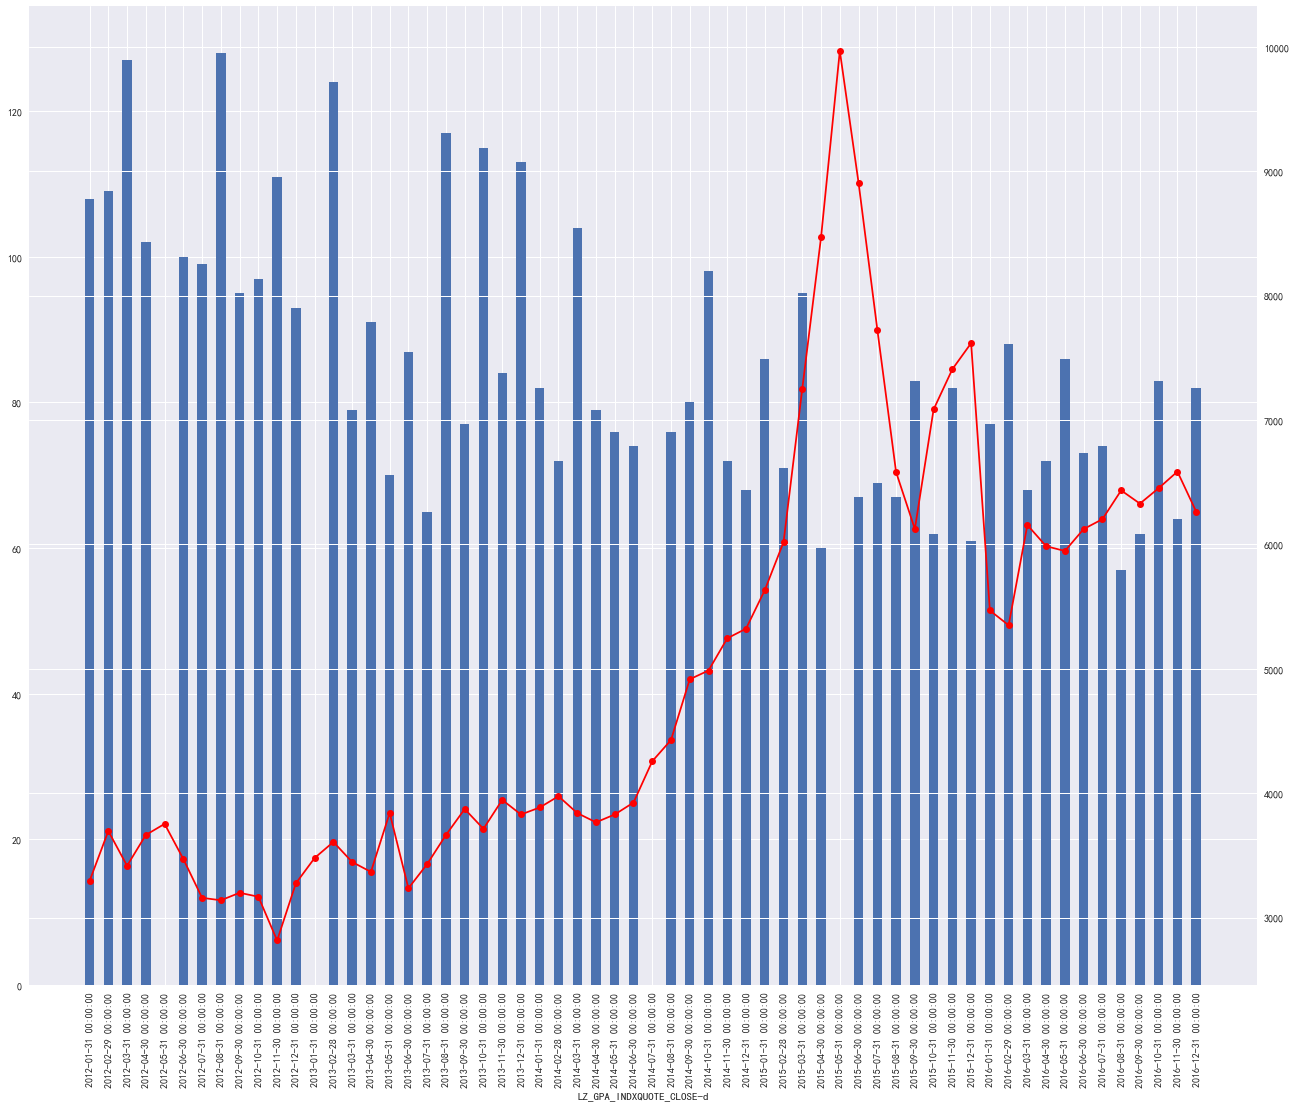

In [120]:
# Plot bar and line in same figure
fig = plt.figure(figsize=(22,18))
ax = compareDF['Buy_count'].plot(kind="bar")
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),compareDF[benchMarkIndex],marker='o',color ='r')

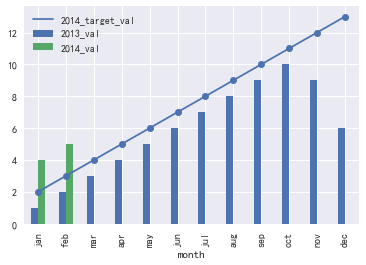

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

left_2013 = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2013_val': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 6]})

right_2014 = pd.DataFrame({'month': ['jan', 'feb'], '2014_val': [4, 5]})

right_2014_target = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2014_target_val': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

df_13_14 = pd.merge(left_2013, right_2014, how='outer')
df_13_14_target = pd.merge(df_13_14, right_2014_target, how='outer')

ax = df_13_14_target[['month', '2014_target_val']].plot(
    x='month', linestyle='-', marker='o')
df_13_14_target[['month', '2013_val', '2014_val']].plot(x='month', kind='bar',
                                                        ax=ax)

plt.show()

In [122]:
inforDF.set_index('TRADE_TIME').resample('M').last()

,CODE,VOLUME,PRICE,TRADE_TYPE,POSITION_AVG_PRICE,COMMISSION
TRADE_TIME,,,,,,
2012-01-31,600408,114600,4.25,1,4.256375,0.0
2012-02-29,002110,63100,8.15,1,8.162225,0.0
2012-03-31,600475,100,11.85,1,11.900000,0.0
2012-04-30,002011,49000,10.30,1,10.315450,0.0
2012-05-31,601126,32000,15.42,-1,15.483190,0.0
2012-06-30,002011,49100,10.43,1,10.445645,0.0
2012-07-31,000656,49400,10.17,1,10.185255,0.0
2012-08-31,600963,700,3.65,1,3.657143,0.0
2012-09-30,000861,38600,14.28,1,14.301420,0.0


In [123]:
filenamePositionList = 'positionlist.csv'
filenameAsset = 'asset.csv'
filenameClose = 'LZ_GPA_QUOTE_TCLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'


filenameValue =  'LZ_GPA_VAL_PB.csv' # 市净率
filenameAdjPrice = 'Own_Factor_AdjustedPriceForward-1d.csv'  # 通过 calAdjustedPrice()函数获得

In [124]:
#
initialAsset = 10000000
# Constants
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

In [125]:
# 必要的数据 股票收盘价格
closeDF = pd.read_csv(path+filenameClose,infer_datetime_format=True,parse_dates=[0],index_col=0)
closeDF.columns = map(lambda x : x.split('.')[0],closeDF.columns)

In [126]:
# 估值因子
factorValue = pd.read_csv(path+filenameValue,infer_datetime_format=True,parse_dates=[0],index_col=0)
factorValue.columns = map(lambda x : x.split('.')[0],factorValue.columns)

In [127]:
# 复权后收盘价
priceADJ = pd.read_csv(path+filenameAdjPrice,infer_datetime_format=True,parse_dates=[0],index_col=0)
priceADJ.columns = map(lambda x : x.split('.')[0],priceADJ.columns)

In [128]:
# 读取仓位信息
positionDF = pd.read_csv(path+filenamePositionList,infer_datetime_format=True,parse_dates=[0],index_col=0)
positionDF['CODE'] = positionDF['CODE'].apply(lambda x :(6-len(str(x)))*'0' + str(x))
assetDF = pd.read_csv(path+filenameAsset,infer_datetime_format=True,parse_dates=[0],index_col=0)
assetDF.is_copy = False
assetDF = assetDF[['STOCK_MARKET','STOCK_BALANCE']]
assetDF['TOTAL'] = assetDF['STOCK_MARKET'] + assetDF['STOCK_BALANCE']

In [129]:
positionDF

,CODE,OPT_POSITION,ORDER_TYPE,TOTAL_COST,TODAY_POSITION
DATE,,,,,
2012-02-10,600853,29700,1,100783.683,0
2012-02-10,002314,10200,1,101080.980,0
2012-02-10,600810,12500,1,100850.750,0
2012-02-10,600777,26500,1,101065.965,0
2012-02-10,600019,19900,1,100993.893,0
2012-02-10,300157,4400,1,98922.824,0
2012-02-10,601988,33200,1,101028.928,0
2012-02-10,600219,13800,1,100564.464,0
2012-02-10,000898,21200,1,100800.700,0


In [130]:
positionDF1 = positionDF[['CODE','OPT_POSITION']]
positionDF1

,CODE,OPT_POSITION
DATE,,
2012-02-10,600853,29700
2012-02-10,002314,10200
2012-02-10,600810,12500
2012-02-10,600777,26500
2012-02-10,600019,19900
2012-02-10,300157,4400
2012-02-10,601988,33200
2012-02-10,600219,13800
2012-02-10,000898,21200


In [131]:
# pivot表格
positionDF1 = positionDF[['CODE','OPT_POSITION']]
positionPivot = pd.pivot_table(positionDF1,index =positionDF1.index,values='OPT_POSITION',columns = ['CODE'])
positionPivot

CODE,000002,000005,000010,000016,000019,000021,000027,000029,000030,000031,...,603017,603020,603123,603167,603308,603333,603366,603766,603979,603993
DATE,,,,,,,,,,,,,,,,,,,,,
2012-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-22,NaN,NaN,NaN,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# 生成风险因子暴露dataframe
factorValue = factorValue.loc[positionPivot.index]
factorValueNorm = ((factorValue.T - factorValue.T.mean()) / factorValue.T.std()).T
exposureDF = ((factorValueNorm[positionPivot.columns] * positionPivot).T / positionPivot.sum(axis=1)).T

In [133]:
#  按每天相加在平均后得到平均的risk exposure
exposureDF.sum(axis=1).mean()

-0.10675693591855419

In [134]:
# 市值数据
priceADJ = priceADJ.loc[positionPivot.index][positionPivot.columns]
profit = priceADJ * positionPivot

In [135]:
profit.pct_change().sum().sum()

475.34576532090705

In [136]:
# 读取行业信息
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF.columns = map(lambda x : x.split('.')[0],indusDF.columns)
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

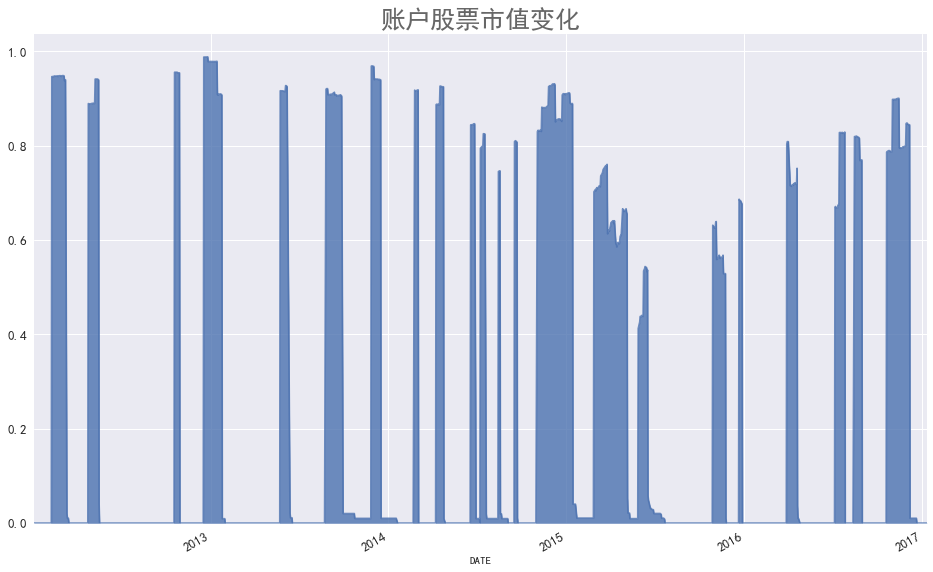

In [137]:
# 市值变化
marketValuePercent = assetDF['STOCK_MARKET'] / assetDF['TOTAL']

#  Visualization
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
marketValuePercent.plot.area(ax = ax, fontsize =13,title =u'账户股票市值变化',alpha =0.8)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [138]:
indusDF

,000005,600601,600602,600651,600652,600653,600654,600656,000004,000002,...,603200,300658,300660,603042,002877,002878,300661,603496,300662,300663
LZ_GPA_INDU_ZX-t,,,,,,,,,,,,,,,,,,,,,
2010-01-04,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,23,25,25,16,2,13,25,10,18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
induExplanation

,LZ_GPA_TMP_INDU_ZX-t
0,石油石化
1,煤炭
2,有色金属
3,电力及公用事业
4,钢铁
5,基础化工
6,建筑
7,建材
8,轻工制造
9,机械


In [140]:
# 日期序列
dateList = sorted(set(positionDF.index))

sample = positionDF[positionDF.index ==dateList[0]]
sample.set_index('CODE',inplace=True)

In [141]:
sampledate = dateList[0]

sample.is_copy = False

sample['PRICE'] = closeDF.loc[dateList[0]]
sample['MARKET_VALUE'] =  sample['OPT_POSITION'] * sample['PRICE']

In [142]:
totalPosPerc = ((sample['OPT_POSITION'] * sample['PRICE']).sum() ) / assetDF.loc[sampledate]

In [143]:
# 收益比例
sample['PNL'] = ((sample['OPT_POSITION'] * sample['PRICE']) - sample['TOTAL_COST']) / sample['TOTAL_COST']

In [144]:
# 行业占比
sample['INDUSTRY'] =  indusDF.loc[dateList[0]]
sample['INDUSTRY'] =  sample['INDUSTRY'].apply(lambda x: int(x)-1)

In [145]:
len(indusDF.loc[dateList[0]])

3348

In [146]:
# 风险因子/标准化
factorValueSlice = factorValue.loc[dateList[0]]
factorValueSlice = (factorValueSlice - factorValueSlice.mean()) / factorValueSlice.std()

In [147]:
# 当天的估值因子暴露
sample['PB'] = factorValueSlice 
exposure = (sample['PB'] * sample['OPT_POSITION']).sum() / sample['OPT_POSITION'].sum()
exposure

-0.21432552069089492

In [148]:
# 当日各行业市值占比
indusProp = sample.groupby('INDUSTRY')['MARKET_VALUE'].sum()/ assetDF.loc[sampledate]['STOCK_MARKET']
indusProp

INDUSTRY
0     0.084691
1     0.063305
2     0.147618
4     0.106502
5     0.225185
6     0.095592
7     0.160053
20    0.031621
28    0.085433
Name: MARKET_VALUE, dtype: float64

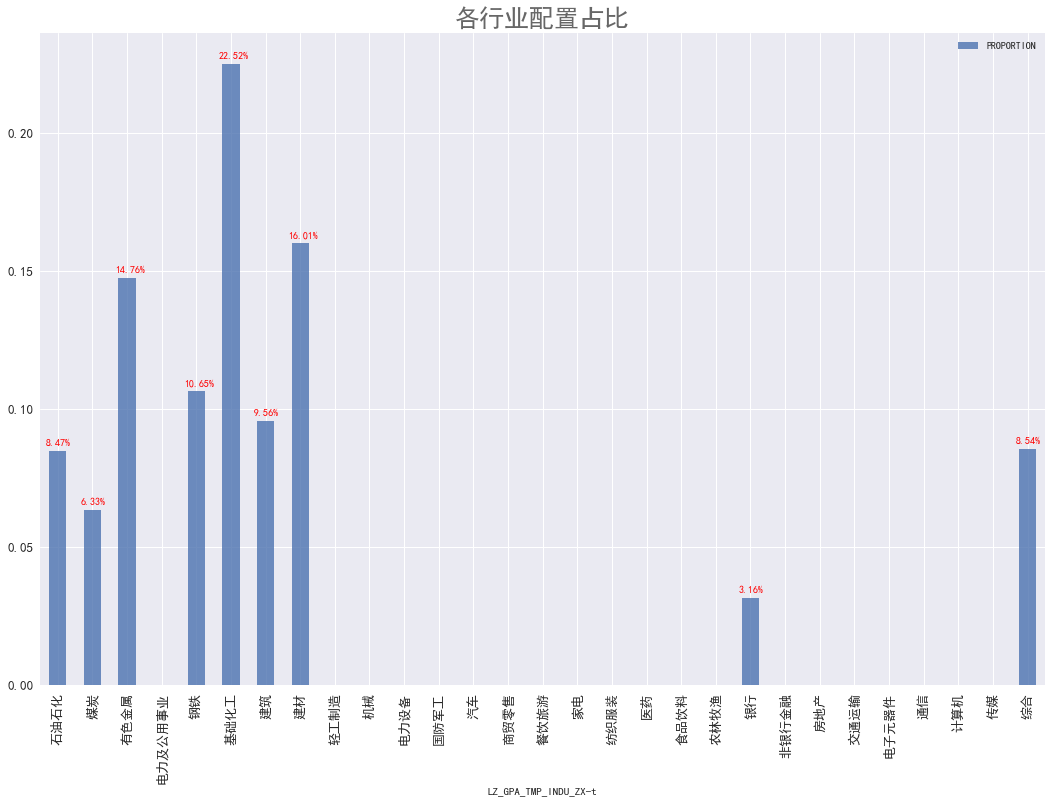

In [149]:
# 可视化
induInfo = induExplanation.copy()
induInfo['PROPORTION'] = indusProp

#  Visualization
fig = plt.figure(figsize=(18,12))
# Add a subplot
ax = fig.add_subplot(111)
induInfo.set_index('LZ_GPA_TMP_INDU_ZX-t').plot(kind='bar',ax = ax, fontsize =13,title =u'各行业配置占比',alpha =0.8)
for i, v in enumerate(induInfo['PROPORTION'].values):
    if ~np.isnan(v):
        ax.text(i-0.35,v+0.002, str(round(v,4)*100)+'%', color='red', fontweight='bold')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [150]:
# 每天重仓股票（持仓最大的十只股票） 占当天整个持仓的比重
topNum = 10 if sample.shape[0] > 10 else sample.shape[0]
top10Stocks = (sample.sort_values('MARKET_VALUE',ascending = False).iloc[:topNum]['MARKET_VALUE'] / assetDF.loc[sampledate]['STOCK_MARKET'])
top10Stocks.sum()

0.11009252553009169

In [151]:
industryID = 20
industryProChange = pd.DataFrame(index = dateList,columns = [induExplanation.iloc[industryID].values],dtype = float)
endOfWeekList = sorted(list(set(industryProChange.iloc[industryProChange.resample('W').size().cumsum().sub(1)].index)))

In [152]:
# 计算某行业市值变化
def IndusMarketValueChange(industryID,dateList):
    '''
    计算行业市值变化，注意此函数含有已定义过的变量，请调用此函数前初始化这些变量
    Input：
    industryID: int, 行业ID，即induExplanation的index
    dateList: List, 需要回放的时间序列，其中每个元素是datetime格式
    Output：
    industryProChange：dataframe, 行业市值数据
    industryPNL：dataframe，行业pnl数据'''
    industryProChange = pd.DataFrame(index = dateList,columns = [induExplanation.iloc[industryID].values],dtype = float)
    industryPNL = pd.DataFrame(index = dateList,columns = [induExplanation.iloc[industryID].values],dtype = float)
    # 计算某行业的股票持仓随时间的变化
    for date in endOfWeekList:
        try:
            # 切片
            #print date
            positionSlice = positionDF[positionDF.index == date]
            positionSlice.is_copy = False
            positionSlice.set_index('CODE',inplace=True)


            positionSlice['INDUSTRY'] =  indusDF.loc[date]

            positionSlice['INDUSTRY'] =  positionSlice['INDUSTRY'].apply(lambda x: int(x)-1 if ~np.isnan(x) else x)

            if industryID in positionSlice['INDUSTRY'].values:
                positionSlice = positionSlice[positionSlice['INDUSTRY'] == industryID]      
                positionSlice['PRICE'] = closeDF.loc[date]
                positionSlice['MARKET_VALUE'] =  positionSlice['OPT_POSITION'] * positionSlice['PRICE']
                industryProChange.loc[date] = positionSlice['MARKET_VALUE'].sum()/ assetDF.loc[sampledate]['STOCK_MARKET']
                #print industryProChange.loc[date]
                industryPNL.loc[date] = ((positionSlice['OPT_POSITION'] * positionSlice['PRICE']).sum() - positionSlice['TOTAL_COST'].sum()) / positionSlice['TOTAL_COST'].sum()

            else:
                print 'Industry ID '+str(industryID)+' is not in the slice of position dataframe on ' + date.strftime("%Y-%m-%d")
                industryProChange.loc[date] = 0
                industryPNL.loc[date] = 0
        except:
            industryProChange.loc[date] = 0
            industryPNL.loc[date] = 0
    return industryProChange,industryPNL

In [153]:
a,b = IndusMarketValueChange(industryID,endOfWeekList)

Industry ID 20 is not in the slice of position dataframe on 2012-03-15
Industry ID 20 is not in the slice of position dataframe on 2012-05-17
Industry ID 20 is not in the slice of position dataframe on 2013-01-25
Industry ID 20 is not in the slice of position dataframe on 2013-01-30
Industry ID 20 is not in the slice of position dataframe on 2013-06-14
Industry ID 20 is not in the slice of position dataframe on 2013-06-17
Industry ID 20 is not in the slice of position dataframe on 2013-09-30
Industry ID 20 is not in the slice of position dataframe on 2013-10-11
Industry ID 20 is not in the slice of position dataframe on 2013-10-18
Industry ID 20 is not in the slice of position dataframe on 2013-10-25
Industry ID 20 is not in the slice of position dataframe on 2013-11-01
Industry ID 20 is not in the slice of position dataframe on 2013-11-08
Industry ID 20 is not in the slice of position dataframe on 2013-11-15
Industry ID 20 is not in the slice of position dataframe on 2013-11-22
Indust

In [154]:
# 从 0 -28 中选
start =time.time()
industryID = 20 # 银行
industryProChange = pd.DataFrame(index = dateList,columns = [induExplanation.iloc[industryID].values],dtype = float)
industryPNL = pd.DataFrame(index = dateList,columns = [induExplanation.iloc[industryID].values],dtype = float)
# 计算某行业的股票持仓随时间的变化
for date in endOfWeekList:
    try:
        # 切片
        #print date
        positionSlice = positionDF[positionDF.index == date]
        positionSlice.is_copy = False
        positionSlice.set_index('CODE',inplace=True)
        

        positionSlice['INDUSTRY'] =  indusDF.loc[date]

        positionSlice['INDUSTRY'] =  positionSlice['INDUSTRY'].apply(lambda x: int(x)-1 if ~np.isnan(x) else x)
        
        if industryID in positionSlice['INDUSTRY'].values:
            positionSlice = positionSlice[positionSlice['INDUSTRY'] == industryID]      
            positionSlice['PRICE'] = closeDF.loc[date]
            positionSlice['MARKET_VALUE'] =  positionSlice['OPT_POSITION'] * positionSlice['PRICE']
            industryProChange.loc[date] = positionSlice['MARKET_VALUE'].sum()/ assetDF.loc[sampledate]['STOCK_MARKET']
            #print industryProChange.loc[date]
            industryPNL.loc[date] = ((positionSlice['OPT_POSITION'] * positionSlice['PRICE']).sum() - positionSlice['TOTAL_COST'].sum()) / positionSlice['TOTAL_COST'].sum()
             
        else:
            print 'Industry ID '+str(industryID)+' is not in the slice of position dataframe on ' + date.strftime("%Y-%m-%d")
            industryProChange.loc[date] = 0
            industryPNL.loc[date] = 0
    except:
        industryProChange.loc[date] = 0
        industryPNL.loc[date] = 0
print time.time() - start

Industry ID 20 is not in the slice of position dataframe on 2012-03-15
Industry ID 20 is not in the slice of position dataframe on 2012-05-17
Industry ID 20 is not in the slice of position dataframe on 2013-01-25
Industry ID 20 is not in the slice of position dataframe on 2013-01-30
Industry ID 20 is not in the slice of position dataframe on 2013-06-14
Industry ID 20 is not in the slice of position dataframe on 2013-06-17
Industry ID 20 is not in the slice of position dataframe on 2013-09-30
Industry ID 20 is not in the slice of position dataframe on 2013-10-11
Industry ID 20 is not in the slice of position dataframe on 2013-10-18
Industry ID 20 is not in the slice of position dataframe on 2013-10-25
Industry ID 20 is not in the slice of position dataframe on 2013-11-01
Industry ID 20 is not in the slice of position dataframe on 2013-11-08
Industry ID 20 is not in the slice of position dataframe on 2013-11-15
Industry ID 20 is not in the slice of position dataframe on 2013-11-22
Indust

In [155]:
industryPNL.head(10)

,银行
2012-02-10,-0.003241
2012-02-13,NaN
2012-02-14,NaN
2012-02-15,NaN
2012-02-16,NaN
2012-02-17,-0.009150
2012-02-20,NaN
2012-02-21,NaN
2012-02-22,NaN
2012-02-23,NaN


In [156]:
industryProChange.head(10)

,银行
2012-02-10,0.031621
2012-02-13,NaN
2012-02-14,NaN
2012-02-15,NaN
2012-02-16,NaN
2012-02-17,0.031433
2012-02-20,NaN
2012-02-21,NaN
2012-02-22,NaN
2012-02-23,NaN


In [157]:
# 


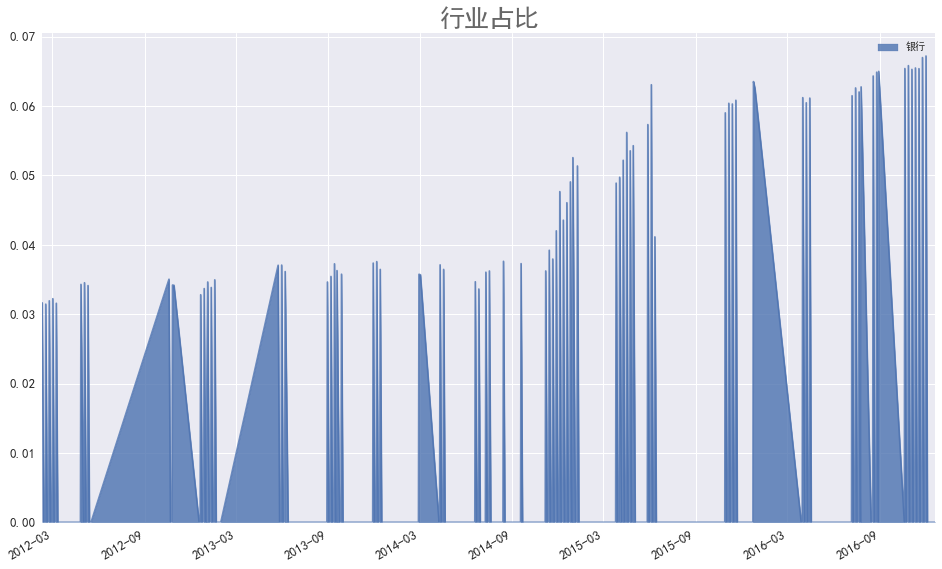

In [158]:
#  Visualization
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
industryProChange.plot.area(ax = ax, fontsize =13,title =u'行业占比',alpha =0.8)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [159]:
filename = 'C:/Users/LZJF_02/Desktop/ru888_1min.csv'
savename = 'C:/Users/LZJF_02/Desktop/ru888_1min_modi.csv'

In [160]:
ru888 = pd.read_csv(filename,infer_datetime_format=True,header=None,names = ['Open', 'High', 'Low', 'Close','TotalVolume','Position'])

IOError: File C:/Users/LZJF_02/Desktop/ru888_1min.csv does not exist

In [ ]:
ru888.index = ru888.index.map(lambda x : pd.to_datetime(x))

ru888['Time'] = ru888.index.map(lambda x : x.time)

ru888.index = ru888.index.map(lambda x : x.date)

ru888.index.name = 'Date'

ru888.drop('Position',axis=1,inplace = True)

In [ ]:
ru888.to_csv(savename,na_rep='NaN',date_format='%Y%m%d')

In [ ]:
ru888

In [ ]:
def tbDataToVnpy(filePath,fileName,savePath,newName):
    '''Adjust format of data downloaded from TradeBlazer to Vnpy data format.
    Input: 
    filePath: String.Old path for original csv data.
    fileName: String.Old file name for original csv data.
    savePath: String.new path for adjusted csv data.
    newName: String.new Name for adjusted csv data.'''
    data = pd.read_csv(filePath+fileName,infer_datetime_format=True,header=None,names = ['Open', 'High', 'Low', 'Close','TotalVolume','Position'])
    data.index = data.index.map(lambda x : pd.to_datetime(x))
    data['Time'] = data.index.map(lambda x : x.time)
    data.index = data.index.map(lambda x : x.date)
    data.index.name = 'Date'
    data.drop('Position',axis=1,inplace = True)
    data.to_csv(savePath+newName,na_rep='NaN',date_format='%Y%m%d')
    return data

In [ ]:
old_path = 'C:/Users/LZJF_02/Desktop/original_data/'
new_path = 'C:/Users/LZJF_02/Desktop/modified_data/'
filename = 'ru000_1min.csv'
newname = 'ru000_1min_modi.csv'

In [ ]:
#c = tbDataToVnpy(old_path,filename,new_path,newname)